In [70]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
dataset = pd.read_csv("/content/drive/MyDrive/churn_dataset.csv")

In [73]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
dataset.shape

(7043, 25)

In [99]:
# check missing data
dataset.isnull().sum()

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,11
Churn,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_Yes,0


In [76]:
# check duplicate customer
dataset.duplicated().sum()

0

In [77]:
#Droping unwanted feature
dataset.drop(columns=['customerID'],inplace=True)

In [78]:
dataset.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [79]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
********************
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
********************
DeviceProtection
No                     3

#### Replacing 'No internet service' and 'No phone service' with 'No'

In [80]:
dataset.replace(['No internet service','No phone service'], 'No', inplace=True)

In [81]:
categorical_features = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  print(dataset[i].value_counts())
  print("********************")

gender
Male      3555
Female    3488
Name: count, dtype: int64
********************
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
********************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
********************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
********************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
********************
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
********************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
********************
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
********************
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
********************
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
********************
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
********************
StreamingTV
No     4336
Yes    2707
Name:

# EDA

Text(0.5, 1.0, 'Gender vs Churn')

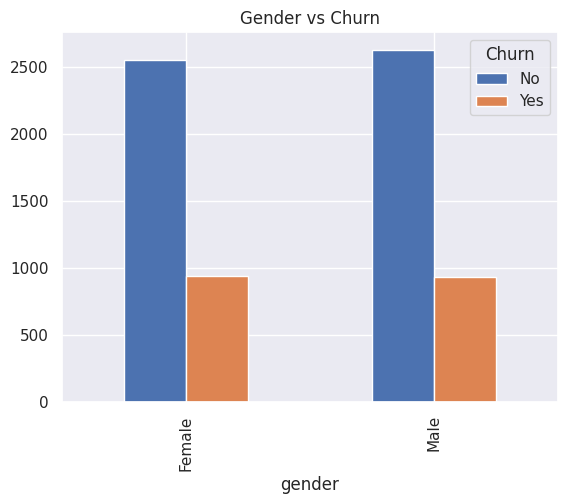

In [82]:
# Relation between Gender vs Churn
gender_wise = pd.crosstab(dataset['gender'], dataset['Churn'])
gender_wise.plot(kind='bar')
plt.title("Gender vs Churn")

# Handling Char/Object value

In [83]:
#Encoding categorical features

categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
             'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']
for i in categorical_features:
  dataset = pd.get_dummies(dataset, columns=[i],drop_first=True,dtype='int64')


In [94]:
dataset.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,2
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0


In [114]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   int64  
 6   Partner_Yes                            7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   PhoneService_Yes                       7043 non-null   int64  
 9   MultipleLines_Yes                      7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

In [89]:
# mapping
dataset['Churn'] = np.where(dataset['Churn'] == 'Yes', 1, 0)  # yes=1, No=0

In [90]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

#### Handling missing value

In [111]:
dataset[dataset['TotalCharges'].isnull()]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
488,0,0,52.55,NaN,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0
753,0,0,20.25,NaN,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
936,0,0,80.85,NaN,0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0
1082,0,0,25.75,NaN,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1340,0,0,56.05,NaN,0,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0,0
3331,0,0,19.85,NaN,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3826,0,0,25.35,NaN,0,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4380,0,0,20.00,NaN,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5218,0,0,19.70,NaN,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
6670,0,0,73.35,NaN,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0


In [113]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.265370,0.504756,0.483033,0.299588,0.903166,0.421837,0.439585,0.216669,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,2.177623
std,0.368612,24.559481,30.090047,2265.270398,0.441561,0.500013,0.499748,0.458110,0.295752,0.493888,0.496372,0.412004,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,1.932502
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [112]:
dataset['TotalCharges'] = dataset['TotalCharges'].fillna(dataset['TotalCharges'].median())

In [93]:
condition = [((dataset.tenure >= 0)&(dataset.tenure <= 12)), ((dataset.tenure > 12)&(dataset.tenure <= 24)),
             ((dataset.tenure > 24)&(dataset.tenure <= 36)),((dataset.tenure > 36)&(dataset.tenure <= 48)),
             ((dataset.tenure > 48)&(dataset.tenure <= 60)), (dataset.tenure > 60)]

#choice = ['0-1year','1-2years', '2-3years', '3-4years','4-5years','more than 5 years']
choice = [0,1, 2, 3, 4, 5]
dataset['tenure_range'] = np.select(condition, choice)

In [134]:
dataset.drop(columns=['tenure'],inplace=True)

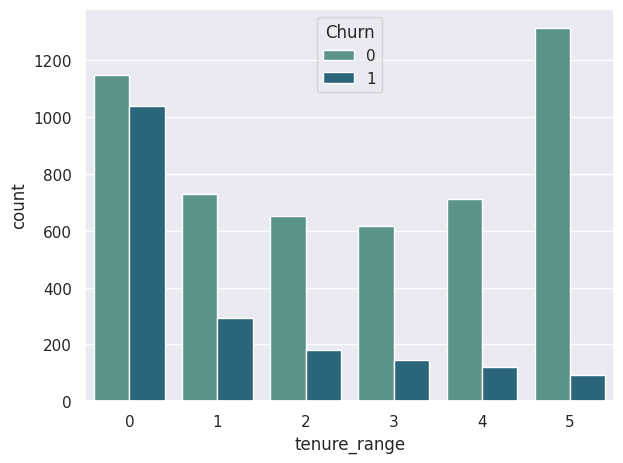

In [95]:
sns.countplot(x= 'tenure_range', hue='Churn', data=dataset, palette='crest', order=choice)
plt.tight_layout()

#### We can notice that customers who stay longer are more loyal to the company and very small number who leave after staying more than 4 years. On the other hand, customers churn rate is very high during the first year.

## Stastical Test

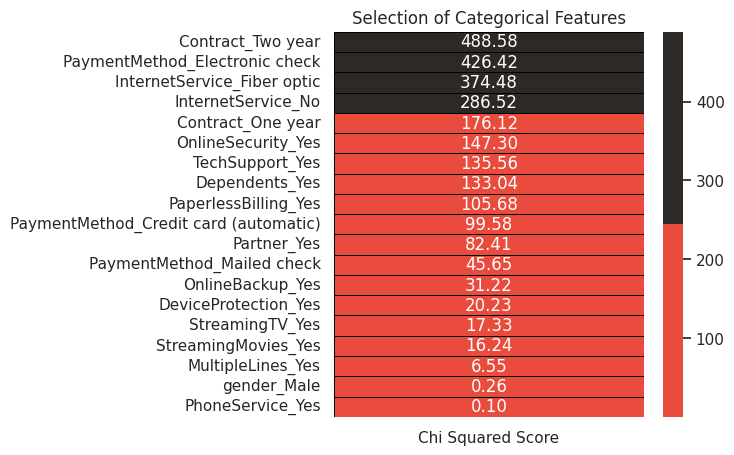

In [121]:
# Chi-Square Test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

categorical_features = ['gender_Male','Partner_Yes','Dependents_Yes','PhoneService_Yes','MultipleLines_Yes','InternetService_Fiber optic',
             'InternetService_No','OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
            'StreamingTV_Yes','StreamingMovies_Yes','Contract_One year','Contract_Two year', 'PaperlessBilling_Yes','PaymentMethod_Credit card (automatic)'
            ,'PaymentMethod_Electronic check','PaymentMethod_Mailed check']
colors = ['#E94B3C', '#2D2926']
features = dataset.loc[:,categorical_features]
target = dataset['Churn']
best_features = SelectKBest(score_func = chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(categorical_features),
                             columns = ['Chi Squared Score'])

plt.subplots(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'Chi Squared Score'),
            annot=True, cmap = colors, linewidths = 0.4, linecolor = 'black', fmt = '.2f');
plt.title('Selection of Categorical Features')
plt.show()

Contract_Two year,PaymentMethod_Electronic, InternetService_Fiber optic check and InternetService_No feature gives more wieghtage to target feature

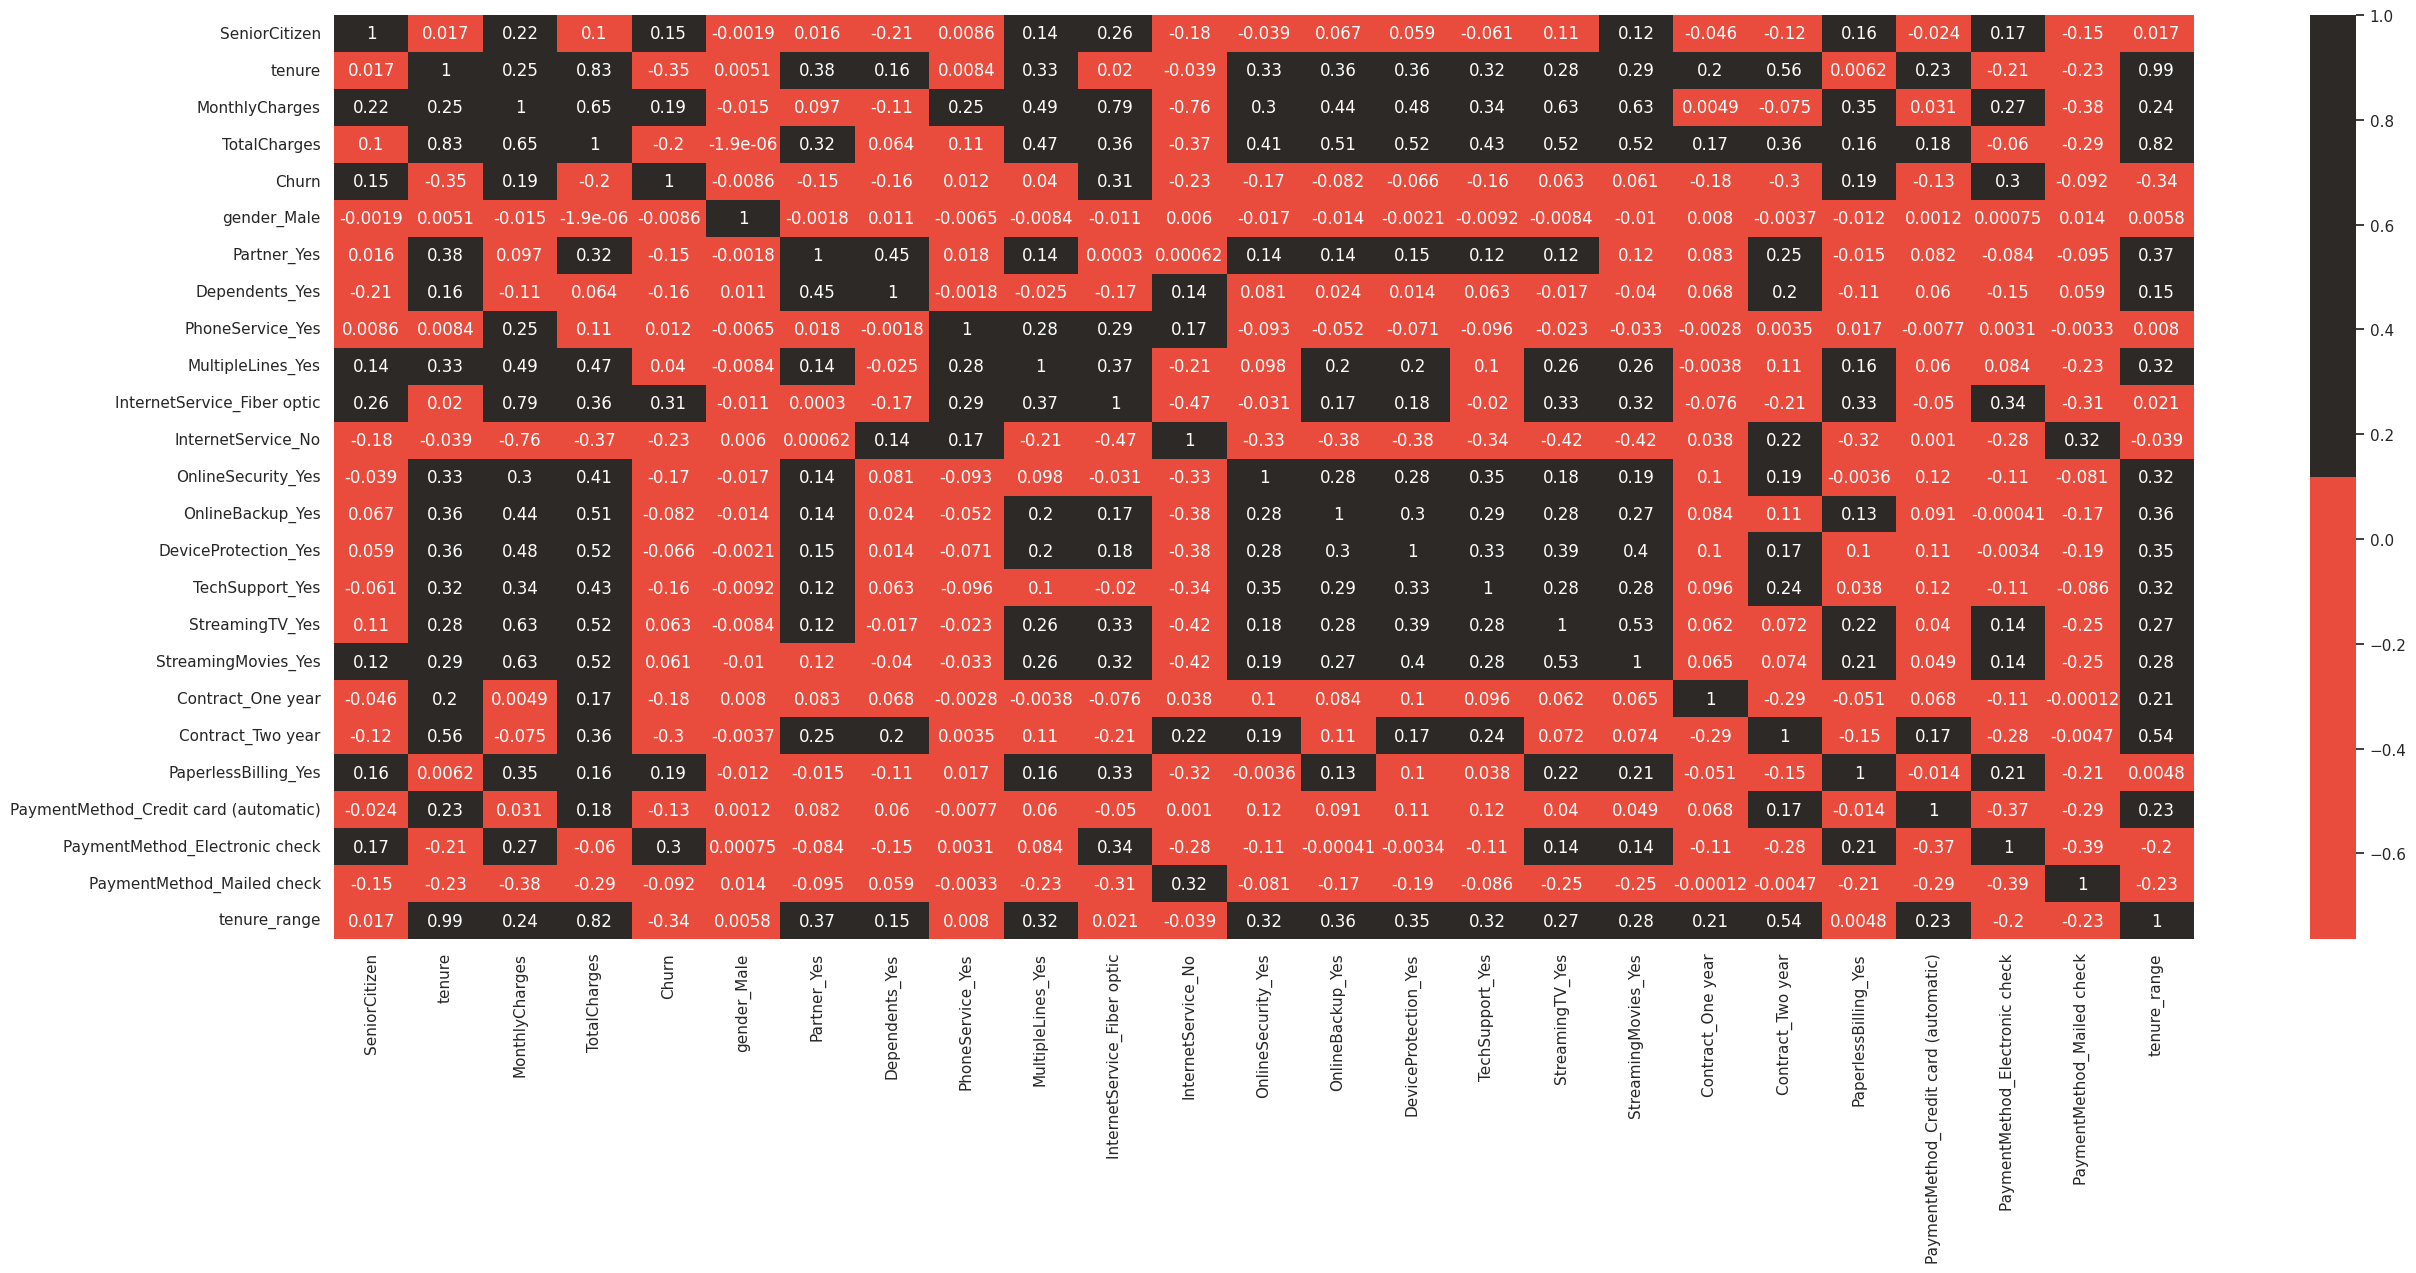

In [124]:
plt.figure(figsize=(30,12))
sns.heatmap(dataset.corr(), cmap=colors, annot=True);

In [135]:
# splitting the data into independent and dependent variable
x = dataset.drop(['Churn'], axis=1)
y = dataset['Churn']

In [136]:
# Feature Importance from RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x, y)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Random Forest")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Random Forest
TotalCharges: 0.2828
MonthlyCharges: 0.2074
InternetService_Fiber optic: 0.1003
tenure_range: 0.0940
PaymentMethod_Electronic check: 0.0290
gender_Male: 0.0250
PaperlessBilling_Yes: 0.0232
Partner_Yes: 0.0214
SeniorCitizen: 0.0201
Dependents_Yes: 0.0185
OnlineBackup_Yes: 0.0180
OnlineSecurity_Yes: 0.0167
TechSupport_Yes: 0.0164
MultipleLines_Yes: 0.0160
Contract_One year: 0.0159
Contract_Two year: 0.0159
DeviceProtection_Yes: 0.0152
StreamingMovies_Yes: 0.0131
PaymentMethod_Mailed check: 0.0124
PaymentMethod_Credit card (automatic): 0.0123
StreamingTV_Yes: 0.0111
InternetService_No: 0.0106
PhoneService_Yes: 0.0045


In [137]:
# Feature Importance from GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x, y)
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("\nFeature Importance from Gradient Boosting")
for i in range(x.shape[1]):
    print(f"{x.columns[indices[i]]}: {importances[indices[i]]:.4f}")


Feature Importance from Gradient Boosting
tenure_range: 0.2327
InternetService_Fiber optic: 0.2022
TotalCharges: 0.1292
PaymentMethod_Electronic check: 0.1231
Contract_Two year: 0.0686
MonthlyCharges: 0.0614
Contract_One year: 0.0576
InternetService_No: 0.0375
PaperlessBilling_Yes: 0.0188
OnlineSecurity_Yes: 0.0154
TechSupport_Yes: 0.0121
StreamingMovies_Yes: 0.0095
SeniorCitizen: 0.0084
MultipleLines_Yes: 0.0056
StreamingTV_Yes: 0.0043
PhoneService_Yes: 0.0042
gender_Male: 0.0035
Dependents_Yes: 0.0035
Partner_Yes: 0.0008
OnlineBackup_Yes: 0.0007
PaymentMethod_Credit card (automatic): 0.0007
PaymentMethod_Mailed check: 0.0001
DeviceProtection_Yes: 0.0000


## Split train data and test data

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [127]:
import imblearn
from imblearn.over_sampling import SMOTE
smote= SMOTE()
x_smote, y_smote = smote.fit_resample(x_train,y_train)
print("Original-",y_train.value_counts())
print("After SMOTE-",y_smote.value_counts())

Original- Churn
0    4148
1    1486
Name: count, dtype: int64
After SMOTE- Churn
0    4148
1    4148
Name: count, dtype: int64


In [128]:
# data leakage problem -

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_smote)
x_test = sc.transform(x_test)

In [129]:
x_train=pd.DataFrame(x_train,columns=x_smote.columns)
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.397711,1.854264,0.651161,1.981920,-0.887221,-0.783987,-0.519855,0.343378,1.270005,-1.020214,-0.438321,-0.502410,1.65896,1.610731,1.953882,1.332831,1.328658,-0.417619,2.234775,-1.201197,-0.418614,-0.729023,-0.468276,1.714078
1,-0.397711,1.854264,1.672136,2.957546,-0.887221,1.275531,1.923612,0.343378,1.270005,0.980187,-0.438321,1.990408,1.65896,1.610731,1.953882,1.332831,1.328658,-0.417619,2.234775,0.832503,-0.418614,-0.729023,-0.468276,1.714078
2,-0.397711,0.561633,0.229834,0.455176,1.127115,1.275531,1.923612,0.343378,1.270005,-1.020214,-0.438321,1.990408,1.65896,1.610731,-0.511802,1.332831,-0.752639,-0.417619,-0.447472,0.832503,2.388838,-0.729023,-0.468276,0.646150
3,-0.397711,-0.480811,-0.458974,-0.511915,1.127115,-0.783987,-0.519855,-2.912240,-0.787398,-1.020214,-0.438321,1.990408,1.65896,1.610731,1.953882,1.332831,-0.752639,-0.417619,2.234775,-1.201197,-0.418614,-0.729023,2.135491,-0.421777
4,-0.397711,1.854264,-0.437995,0.985506,1.127115,1.275531,1.923612,-2.912240,-0.787398,-1.020214,-0.438321,1.990408,1.65896,1.610731,1.953882,-0.750283,1.328658,-0.417619,2.234775,0.832503,2.388838,-0.729023,-0.468276,1.714078


In [130]:
x_test=pd.DataFrame(x_test,columns=x_smote.columns)
x_test.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range
0,-0.397711,1.812566,1.135425,2.353264,-0.887221,1.275531,1.923612,0.343378,1.270005,0.980187,-0.438321,1.990408,-0.602787,1.610731,1.953882,-0.750283,1.328658,-0.417619,2.234775,-1.201197,-0.418614,1.371698,-0.468276,1.714078
1,-0.397711,-1.106277,-0.778902,-0.911366,1.127115,-0.783987,-0.519855,0.343378,-0.787398,-1.020214,-0.438321,-0.502410,-0.602787,-0.620836,-0.511802,-0.750283,-0.752639,-0.417619,-0.447472,0.832503,-0.418614,-0.729023,2.135491,-0.955741
2,-0.397711,-1.106277,-1.693234,-0.923367,1.127115,-0.783987,-0.519855,0.343378,-0.787398,-1.020214,2.281433,-0.502410,-0.602787,-0.620836,-0.511802,-0.750283,-0.752639,-0.417619,-0.447472,-1.201197,-0.418614,-0.729023,2.135491,-0.955741
3,2.514389,-1.064580,-0.623309,-0.879519,-0.887221,1.275531,-0.519855,0.343378,-0.787398,-1.020214,-0.438321,-0.502410,1.658960,-0.620836,-0.511802,-0.750283,-0.752639,-0.417619,-0.447472,-1.201197,2.388838,-0.729023,-0.468276,-0.955741
4,2.514389,-1.106277,0.198366,-0.898540,1.127115,-0.783987,-0.519855,0.343378,1.270005,0.980187,-0.438321,-0.502410,-0.602787,-0.620836,-0.511802,-0.750283,-0.752639,-0.417619,-0.447472,0.832503,-0.418614,1.371698,-0.468276,-0.955741


In [131]:
x_test.shape

(1409, 24)